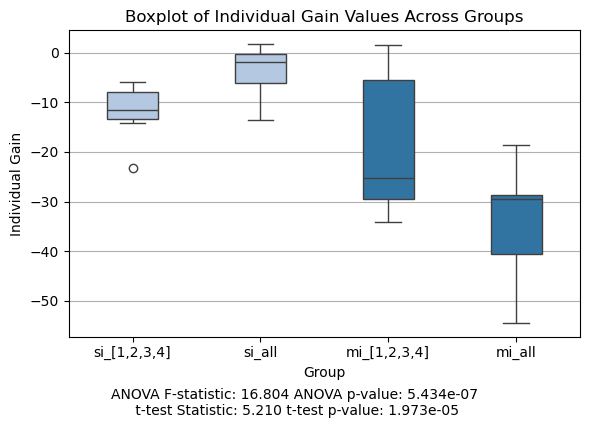

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, ttest_ind

# 读取数据，注意这里的文件名可能需要根据实际情况修改
prefix1_g1 = 'single_island_optimization_enemy1234.csv'
prefix1_g2 = 'single_island_optimization_enemy12345678.csv'
prefix2_g1 = 'multi_island_optimization_enemy1234.csv'
prefix2_g2 = 'multi_island_optimization_enemy12345678.csv'

gain_si_g1 = pd.read_csv(prefix1_g1)
gain_si_g2 = pd.read_csv(prefix1_g2)

gain_mi_g1 = pd.read_csv(prefix2_g1)
gain_mi_g2 = pd.read_csv(prefix2_g2)

# 创建包含所有数据的列表
dataframes = [gain_si_g1, gain_si_g2, gain_mi_g1, gain_mi_g2]
df_names = ['si_[1,2,3,4]', 'si_all', 'mi_[1,2,3,4]', 'mi_all']

# 合并数据并添加表示来源组的列
all_data = pd.concat([df.assign(Group=df_name) for df, df_name in zip(dataframes, df_names)], ignore_index=True)

# 创建箱型图
plt.figure(figsize=(6,4))
palette = ['#aec7e8', '#aec7e8', '#1f77b4', '#1f77b4']
sns.boxplot(x='Group', y='Individual Gain', data=all_data, hue='Group', palette=palette, width=0.4, dodge=False)
plt.title('Boxplot of Individual Gain Values Across Groups')
plt.xlabel('Group')
plt.ylabel('Individual Gain')
plt.grid(axis='y')

# 检查输入数据是否为常量
group_gains = [df['Individual Gain'].values for df in dataframes]
if all(np.all(g == g[0]) for g in group_gains):
    f_stat, p_value = np.nan, np.nan
else:
    # 统计分析以验证组间平均值差异是否显著
    f_stat, p_value = f_oneway(*group_gains)

# 统计检验（t检验）比较两种算法
t_stat, t_p_value = ttest_ind(
    all_data[all_data['Group'].isin(['si_[1,2,3,4]', 'si_all'])]['Individual Gain'],
    all_data[all_data['Group'].isin(['mi_[1,2,3,4]', 'mi_all'])]['Individual Gain'],
    equal_var=False
)

# 在图表下方添加统计检验结果
plt.figtext(0.5, -0.05, f"ANOVA F-statistic: {f_stat:.3f} ANOVA p-value: {p_value:.3e}\n t-test Statistic: {t_stat:.3f} t-test p-value: {t_p_value:.3e}",
            ha='center', fontsize=10)

# 显示箱型图和统计分析结果
plt.tight_layout()
plt.show()